# STA 141B WQ 25 Homework Assignment 1

## Instructions

- Complete the exercises below. Create more code chunks if necessary. Answer all questions. Show results for both the *test* and *run* cases.
- Export the Jupyter Notebook as an PDF file.
- Submit the PDF by **Sunday, January 19th, at 11:59 PM PT** to Gradescope. 
- For each exercise, indicate the region of your answer in the PDF to facilitate grading. 

## Additional information

- Complete this worksheet yourself. 
- You may use the internet or discuss possible approaches to solve the problems with other students. You are not allowed to share your code or your answers with other students.
- No other libraries than those explicitly allowed can be used. 
- Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
- Late homework submissions will not be accepted. No submissions will be accepted by email.
- The total number of points for this assignment is 20.

__Exercise 1__

*This exercise will review basic concepts of programming. Only use pure python code and no other modules.*


A [Fibonacci word](https://en.wikipedia.org/wiki/Fibonacci_word) is a specific sequence of 0s and 1s constructed by concatenating strings in a unique manner. The generation starts with:

```
S0 = "0"
S1 = "01"
```

Subsequent sequences are produced by concatenating the previous two sequences. For instance, `S2` is derived from concatenating `S1` and `S0`, which results in:

```
S2 = "010"
S3 = "01001"
```

Write a function named `fib(n)` that computes the Fibonacci words. Your function should accept an argument `n`, which is a positive integer, where `n` indicates the position of the Fibonacci word to compute. 

Test: 

```
> fib(0)
0
> fib(3)
'01001'
```

Run: 
```
for x in range(10):
    print(f"S{x} = {fib(x)}")
```

*Hint: You may find it helpful to use multiple assignment to swap the values of variables.*

In [2]:
def fib(n): 
    if n == 0:
        return "0"
    if n == 1:
        return "01"
    str = "" # empty string to store the fibonacci sequence 

    # initializing values as first two strings of the sequence 
    S0 = "0" 
    S1 = "01"
    
    # concatenating S0 to S1 to build onto the fibonacci sequence 
    for i in range(2, n+1):
        str = S1 
        S1 += S0
        S0 = str
    return S1 

fib(3)

'01001'

__Exercise 2__

_This exercise will review basic concepts of programming. Only use pure python code and no other modules._



__(a)__ Write a recursive function `seq_count(x, ...)` that returns length of the longest subsequence of identical elements in the sequence object `x`. 

Test: 

```
> seq_count([1, 3, 1, 1, 3, 3, 4, 4, 4])
3
> seq_count((1, 3, 1, 1, 1, '1', 1, [3, 3, 3, 3], 3, 4, 0))
3
```

Run: 
```
seq_count([[1], [1], [1], 1, 3, 3, 2, 3, 3, 3, 3, 2, 4, 0])
seq_count(('G', 'g', 'a', "a", '''a''', 2, 's', 's'))
seq_count([3, 1, int(True), 1, 1, 2, 3, 3])
seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0))
```

In [3]:
def seq_count(x):
    # base cases 
    if len(x) == 0:
        return 0 
    if len(x) == 1: 
        return 1
    
    # helper function to find the longest subsequence of identical elements in x  
    def helper(index, count, max_count):
        
        # when you've reached the end of the sequence, return the max between max and max_count 
        if index == len(x) - 1: 
            return max(count, max_count)
        
        # when the current element in x is the same as the next, increment count 
        if x[index] == x[index + 1]: 
            count += 1
        # otherwise, update max_count as the maximum between max and max_count while resetting count as 1
        else: 
            max_count = max(max_count, count)
            count = 1
        return helper(index + 1, count, max_count) # moves onto the next index 
    return helper(0, 1, 1) # starts at the beginning of x while initializing count and max_count as 1

print(seq_count([[1], [1], [1], 1, 3, 3, 2, 3, 3, 3, 3, 2, 4, 0]))
print(seq_count(('G', 'g', 'a', "a", '''a''', 2, 's', 's')))
print(seq_count([3, 1, int(True), 1, 1, 2, 3, 3]))
print(seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0)))

4
3
4
2


__(b)__ Write a recursive function `pattern_count(x, pattern, ...)` that takes the two iterable objects `x` and `pattern` and returns the length of the longest subsequence of `pattern`. 

Test: 
```
> pattern_count([0, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 4, 1, 2], (1, 2))
3
> pattern_count([], [2])
0
> pattern_count(['ab', 'ab', 'a', 'a', 'b'], 'ab') # elements in pattern must be identical to elements in x! 
1
```


Run: 
```
pattern_count('CGGACTACTAGACT', 'ACT')
pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1])
pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',))
```

In [4]:
def pattern_count(x, pattern):
    # base case
    if len(x) == 0:
        return 0 
    # helper function that finds the length of the longest subsequence of pattern in x

    def helper(x_index, p_index, count, max_count): 
        
        # when all of pattern has been matched, increment count and set max_count as the maximum between count and max_count 
        if p_index == len(pattern): 
            count += 1
            max_count = max(count, max_count)
            return helper(x_index, 0, count, max_count) # sets x index as the current index while resetting the pattern index to the beginning to its sequence 
        
        # when you've reached the end of x, return max_count 
        elif x_index == len(x) - 1: 
            return max_count
        
        # when the element in x matches the element in pattern
        elif x[x_index] == pattern[p_index]: 
            return helper(x_index + 1, p_index + 1, count, max_count)
            # continues checking the next index of x and pattern 
        # otherwise, reset count to 0 and set max_count as the maximum between max and max_count 
        else: 
            count = 0
            max_count = max(count, max_count)
            return helper(x_index + 1, p_index, count, max_count) # moves onto the next index of x, while keeping pattern index the same 
    return helper(0, 0, 0, 0) # starts at the beginning of the sequences and intializes count and max_count as 0 

print(pattern_count('CGGACTACTAGACT', 'ACT'))
print(pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1]))
print(pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',)))

2
1
2


__Exercise 3__

In this exercise, we will generate (pseudo-)random numbers using the inversion and accept-reject method. In order to generate the random numbers you are only allowed draw from the Uniform distribution and use
```
from random import uniform
from scipy.special import binom
from numpy import sqrt, pi, exp, tan, cumsum
from scipy.stats import probplot
import pandas as pd
import matplotlib.pyplot as plt
```

_Inversion method: Let $F$ be a distribution function from which we want to draw. Define the quantile function $F^{-1}(u) = \inf\{x\colon F(x)\geq u, 0\leq u\leq 1\}$. Then, if $U\sim Unif[0,1]$, $F^{-1}(U)$ has distribution function $F$._

_Accept-reject: Let $f$ be a density function from which we want to draw and there exists a density $g$ from which we can draw (e.g., via the inversion method) and for which there exists a constant $c$ such that $f(x)\leq cg(x)$ for all $x$. The following algorithm generates a random variable $X$ with density function $f$._

1. Generate a random variable $X$ from density $g$
2. Generate a random variable $U\sim Unif[0,1]$ (independent from $X$)
3. If $Ucg(X) \leq f(X)$, return $X$, otherwise repeat 1.-3.

_The number of iterations needed to successfully generate $X$ is itself a random variable,
which is geometrically distributed with the success (acceptance) probability $p = P(Ucg(X)\leq f(X))$. Hence, the expected number of iterations is $1/p$. Some calculations show that $p = 1/c$._


__(a)__ Generate $10 000$ samples from $Bin(10, 0.4)$ using __(i)__ the inversion method directly and __(ii)__ using the inversion method to draw corresponding Bernoulli distributed samples. __(iii)__ Plot the resulting empirical distribution functions and add the theoretical distribution function in one figure.

In [42]:
from random import uniform
from scipy.special import binom
import numpy as np
from numpy import sqrt, pi, exp, tan, cumsum, searchsorted
from scipy.stats import probplot
import scipy.stats as stats
from scipy.stats import binom
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
n = 10
p = 0.4
size = 10000
x = np.random.binomial(n, p, size)

In [18]:
# generates binomial samples using the inversion method
def generate_bin_sample(n, p, size):

    # computing CDF of the binomial distribution
    cdf = cumsum([binom.pmf(k,n,p) for k in range(n+1)])
    sample = [] # list to store the samples 

    # generating a number of binomial samples 
    for i in range(size):
        u = uniform(0, 1) # random number u from the uniform distribution 
        k = np.searchsorted(cdf, u) # finding k where CDF of k is greater than or equal to u
        sample.append(k)

    return sample 

n,p,size = 10, 0.4, 10000
# generating binomial samples 
inversion_sample = generate_bin_sample(n,p,size)

In [25]:
# function to generate binomial samples using bernoulli samples 
def generate_binomial_from_bernoulli(n, p, size):
    binomial_samples = []
    
    # generates a number of binomial samples 
    for _ in range(size):
        trials = np.random.binomial(1, p, n)  # n independent bernoulli trials
        binomial_sample = trials.sum()  # sum of bernoulli trials = binomial sample
        binomial_samples.append(binomial_sample)
    
    return binomial_samples

# function to count each binomial outcome 
def count_binomial_outcomes(binomial_samples):
    bin_inv_count = []
    
    # count of each outcome from 0 to 10 (possible binomial outcomes)
    for i in range(0, 11):
        bin_inv_count.append(binomial_samples.count(i))  # Count how many times 'i' appears in the samples
    
    return bin_inv_count 

binomial_samples = generate_binomial_from_bernoulli(n, p, size)
bin_inv_count = count_binomial_outcomes(inversion_sample)
bin_bern_count = count_binomial_outcomes(binomial_samples)

In [26]:
x = np.arange(0, 11)
pmf = binom.pmf(x, n = 10, p = 0.4)

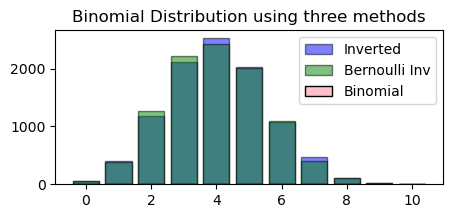

In [27]:
plt.figure(figsize=(5, 2))
plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], bin_inv_count, color = "blue", edgecolor = "black", alpha = 0.5)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], bin_bern_count, color = "green", edgecolor = "black", alpha = 0.5)
plt.bar(x, pmf, color = "pink", edgecolor = "black", alpha = 1)
plt.title("Binomial Distribution using three methods")
plt.legend(["Inverted", "Bernoulli Inv", "Binomial"])
plt.show()

__(b)__ Generate $10000$ samples from the standard normal distribution using the accept-reject method with candidate density $g(x) = (\pi(1+x^2))^{-1}$ with distribution funciton $G(x) = \tan^{-1}(x)/\pi$ from the standard Cauchy distribution. To this end, 
__(i)__ determine (mathematically or via simulation) the value of $c\geq1$ closest to one so that $f(x)\leq cg(x)$ for all $x$. 
 __(ii)__ Obtain $10000$ standard normal random variables using the accept-reject method, generating Cauchy distributed random variables using inversion method. 
__(iii)__ Compare estimated and theoretical acceptance probabilities.
__(iv)__ Generate a QQ-plot of the generated sample.

In [53]:
# standard normal distribution function
def normal(x):
    return (1 / sqrt(2 * pi)) * exp(-x**2 / 2)

# cauchy distribution function
def g(x):
    return 1 / (pi * (1 + x**2))

# calculate the ratio f(x) / g(x)
def ratio(x):
    return normal(x) / g(x)

# generate values of x between -10 and 10
x_vals = np.linspace(-10, 10, 1000)

# calculate the ratio for each value of x
ratios = ratio(x_vals)

# find the maximum ratio to determine the value of c
c = max(ratios)
print(c)

1.52028539146183


In [ ]:
# cauchy inverse CDF (using tan)
def cauchy_sample():
    u = np.random.uniform(0, 1)
    return tan(pi * (u - 0.5))

# accept-reject method to generate standard normal samples
def AR(n):
    accepted = []  # list to store accepted samples
    accept = 0
    reject = 0 
    
    while len(accepted) < n:
        # generate a cauchy sample using the inverse CDF method
        X = cauchy_sample()
        
        # generate a uniform random variable for the accept-reject step
        U = np.random.uniform(0, 1)
        
        # check whether or not its accepted or rejected
        if U <= normal(X) / (c * g(X)):
            accepted.append(X)
            accept += 1
        else:
            reject += 1
    
    # return the total number of trials and the accepted samples
    return (accept + reject), accepted

# generate 10000 standard normal samples using the accept-reject method
index, accepted = AR(10000)

print(index)
print(len(accepted))

15094
10000


In [58]:
estimated_acceptance_probability = len(accepted) / index
print(estimated_acceptance_probability)

theoretical_probability = np.mean(ratios)
print(theoretical_probability)

0.6625149065853981
0.31384510609362043


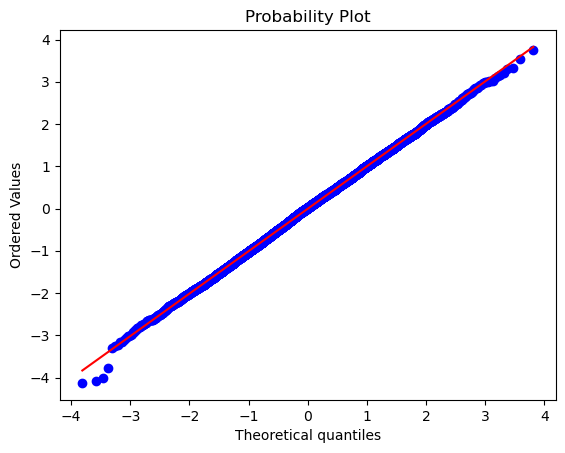

In [56]:
probplot(accepted, plot = plt)
plt.show()

__Exercise 4__

The demographic makeup of regions can offer crucial insights into various socio-economic factors. For policymakers, understanding age distributions can be particularly useful, as it can provide direction for initiatives ranging from educational policy to elderly care. In this section, we will work with a dataset detailing the age distribution across United States counties, broken down into specific age bins.

The files `county_age_dist.csv`, `fips_state.csv` and `fips_county.csv` contain information about the age distribution of counties in selected brackets as well as names and [FIPS](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) codes and additional information.

__(a, i)__ Merge all three data frames into one `pandas.DataFrame` object names `data` with appropriate column names. __(ii)__ Remove the `info` column. Standardize column names and entries to be capitalized according to spelling rules. Remove any preceding whitespace if present for any entries. Run:
```
data.head(4)
```

In [62]:
county_age_dist = pd.read_csv("~/downloads/county_age_dist.csv", dtype = {'fips':str}) # importing the csv file and turning the variable, fips into a string 
county_age_dist.head()

,fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
0,01001,25941,11422,12315,13828,14000,12697,9594,5430,1945
1,01003,86587,37568,44133,46730,49675,52405,43252,23262,8854
2,01005,11057,6162,6603,5907,6490,6377,5255,2795,1074
3,01007,9671,5241,5788,5472,6707,5563,4270,2555,638
4,01009,25671,11360,12635,13570,14737,14123,12106,6560,2022


In [63]:
fips_state = pd.read_csv("~/downloads/fips_state.csv", sep='; ', dtype = {'FIPS':str, 'STATE':str}) # importing the csv file and turning the variables, State and FIPS into a string 
fips_state.head()

/var/folders/3p/x6vrdj4j1bsc468b8hdvhq2r0000gn/T/ipykernel_39420/444833625.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fips_state = pd.read_csv("~/downloads/fips_state.csv", sep='; ', dtype = {'FIPS':str, 'STATE':str})


,FIPS,STATE
0,01,ALABAMA
1,02,ALASKA
2,04,ARIZONA
3,05,ARKANSAS
4,06,CALIFORNIA


In [64]:
fips_county = pd.read_csv("~/downloads/fips_county.csv") # importing the csv file 
fips_county.head()

,fips,name,info
0,01000,Alabama,NaN
1,01001,Autauga County,NaN
2,01003,Baldwin County,NaN
3,01005,Barbour County,NaN
4,01007,Bibb County,NaN


In [65]:
data = pd.merge(county_age_dist, fips_county, on='fips') # merging county_age_dist and fips_count on their common column, fips, combining their data

fips_to_state = dict(zip(fips_state['FIPS'], fips_state['STATE'])) # creating a dictionary that assigns fips to their corresponding state 
data['State'] = data['fips'].str[:2].map(fips_to_state) # creating the column, State, in the dataframe by mapping the first two digits of the fips column to state by using the dictionary 

data = data.drop([' info'], axis = 1) # dropping info column 
data = data.rename(columns={'fips':'Fips', ' name':'County'}) # renaming columns 

In [66]:
data['State'] = data['State'].str.capitalize() # capitalizing the first letter of the state name in the State column 

In [67]:
data.head(4)

,Fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,County,State
0,01001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,Alabama
1,01003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,Alabama
2,01005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,Alabama
3,01007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,Alabama


__(b)__ For each county and state, compute the proportion of elderly `CPE` and `SPE` (65 and older) to the total population as well as the proportion of young people `CPY` and `SPY` (24 or younger). Add those values to the data frame. You may ignore all FIPS regions that are not in states. 

Test: 

```
> data.head(4)
```
| | FIPS |  0-17 | 18-24 | 25-34 | 35-44 | 45-54 | 55-64 | 65-74 | 75-84 |   85+ | County |          State |     CPY |      CPE |      SPY |      SPE |    
|-----:|------:|------:|------:|------:|------:|------:|------:|------:|------:|-------:|---------------:|--------:|---------:|---------:|---------:|----------|
|   __0__  | 01001 | 25941 | 11422 | 12315 | 13828 | 14000 | 12697 | 9594  | 5430  | 1945   | Autauga County | Alabama | 0.348627 | 0.158334 | 0.341631 | 0.167147 |
|   __1__ | 01003 | 86587 | 37568 | 44133 | 46730 | 49675 | 52405 | 43252 | 23262 | 8854   | Baldwin County | Alabama | 0.316346 | 0.192037 | 0.341631 | 0.167147 |
|   __2__  | 01005 | 11057 | 6162  | 6603  | 5907  | 6490  | 6377  | 5255  | 2795  | 1074   | Barbour County | Alabama | 0.332927 | 0.176411 | 0.341631 | 0.167147 |
|   __3__  | 01007 | 9671  | 5241  | 5788  | 5472  | 6707  | 5563  | 4270  | 2555  | 638    | Bibb County    | Alabama | 0.324845 | 0.162575 | 0.341631 | 0.167147 |

Run: 
```
data.iloc[1000:1004,:]
```

In [68]:
data_age = data.iloc[:, 1:10] # selecting all the age columns, 1-9
data['total_population'] = data_age.sum(axis=1) # creating a column, where it sums up each of the age columns for each row 
data['old_population'] = data.iloc[:, 7:10].sum(axis=1) # creating a column where it selects the 65+ columns and sums it up across each row 
data['young_population'] = data.iloc[:, 1:3].sum(axis=1) # creating a column where it selects the columns of 24 or younger and sums it up across each row 

data['CPY'] =  data['young_population'] / data['total_population'] # finding the proportion by divdiding young population with total population 
data['CPE'] =  data['old_population'] / data['total_population'] # finding the proportion by dividing old population with total population 

data['state_population'] = data.groupby('State')['total_population'].transform('sum') # creating a state population column where it sums up total population for each state across each row 
data['young_state_pop'] = data.groupby('State')['young_population'].transform('sum') # creating a young state population column where it sums up the 24 or younger columns for each state across each row 
data['old_state_pop'] = data.groupby('State')['old_population'].transform('sum') # creating an old state population column where it sums up the 65 or older columns for each state across each row 

data['SPY'] = data['young_state_pop'] / data['state_population'] # finding the proportion by dividing the two columns
data['SPE'] = data['old_state_pop'] / data['state_population'] # finding the proportion by dividing the two columsn 

data = data.drop(columns = ['total_population', 'old_population', 'young_population', 'state_population', 'young_state_pop', 'old_state_pop']) # dropping all the unnecessary columns 
data.head(4)

,Fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,County,State,CPY,CPE,SPY,SPE
0,01001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,Alabama,0.348627,0.158334,0.341631,0.167147
1,01003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,Alabama,0.316346,0.192037,0.341631,0.167147
2,01005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,Alabama,0.332927,0.176411,0.341631,0.167147
3,01007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,Alabama,0.324845,0.162575,0.341631,0.167147
